## Text Extraction from Speech Extraction

In [0]:
!sudo apt-get install -qq python python-dev python-pip build-essential swig libpulse-dev
!sudo pip install pocketsphinx

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# !unzip drive/My\ Drive/emotion

In [0]:
# !pip install --upgrade "ibm-watson>=4.0.1"
# !pip install SpeechRecognition


In [0]:
import json
from os.path import join, dirname
from ibm_watson import SpeechToTextV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

In [0]:
import speech_recognition as sr


In [0]:
import os

In [0]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [0]:
import numpy as np
import pandas as pd

In [0]:
authenticator = IAMAuthenticator('IUsZZBiWve_v7Jd0fGezFwNzODFnNKhZZ9FdhY-GPnZR')
speech_to_text = SpeechToTextV1(authenticator=authenticator)

speech_to_text.set_service_url('https://gateway-lon.watsonplatform.net/speech-to-text/api')


with open('meld/val/neutral/MEL_dia83_utt3_positive_NEU.wav', 'rb') as audio_file:
    speech_recognition_results = speech_to_text.recognize(audio=audio_file, content_type='audio/wav',word_alternatives_threshold=0.9, timestamps=False).get_result()

In [270]:
speech_recognition_results

{'result_index': 0, 'results': []}

In [0]:
file = 'meld/val/neutral/MEL_dia83_utt3_positive_NEU.wav'
file_audio = sr.AudioFile(file)

In [0]:
with file_audio as source:
  audio = r.record(source)

In [274]:
try:
  print(r.recognize_google(audio))
except:
  print(' exception occured')

 exception occured


In [0]:
aud, sr = librosa.load(path=file, duration=6)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

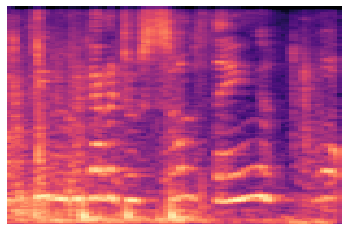

In [191]:
aud, sr = librosa.load(path=file, duration=6)
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
fig = librosa.display.specshow(S_dB, x_axis=None,y_axis=None, sr=sr, fmax=8000)
plt.box(on=False)
plt.savefig('a.jpg')


In [0]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)

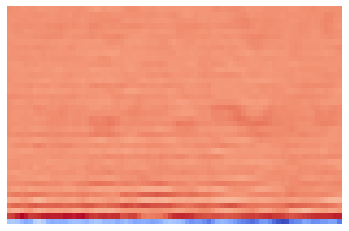

In [186]:
fig = librosa.display.specshow(mfccs, x_axis=None)
plt.box(on=False)
plt.savefig('a.jpg')

In [0]:
from keras.preprocessing import image

In [110]:
img = image.array_to_img(S_dB)

ValueError: ignored

In [0]:
os.mkdir('mel_spectrogram/')

In [0]:
def extract_text_feature(file):
  text = ''
  file_audio = sr.AudioFile(file)
  with file_audio as source:
    audio = r.record(source)
    
  try:
    text = r.recognize_google(audio)
  except Exception:
    with open(file, 'rb') as audio_file:
      speech_recognition_results = speech_to_text.recognize(audio=audio_file, content_type='audio/wav',word_alternatives_threshold=0.9, timestamps=False).get_result()
      if len(speech_recognition_results['results']) > 0:
        text = speech_recognition_results['results'][0]['alternatives'][0]['transcript']
  except Exception:
    text = r.recognize_sphinx(audio) 
  except:
    pass
  if len(text) < 1:
    text = 'no text recognized'
 
  return text


def get_mfcc(file, feature='mfcc'):
  
  # image file
  img = file.replace('.wav', '_mfcc.jpg')
  img = img.split('/')[-1]
  
  # mfcc features
  aud, sr = librosa.load(path=file, duration=6)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
  mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
  
  fig = librosa.display.specshow(mfccs, x_axis=None)
  plt.box(on=False)
  plt.savefig('mfcc/'+img,  pad_inches=0)
  return img

  
def get_mel(file, feature='mel_spec'):
  
  # image file
  img = file.replace('.wav', '_mel.jpg')
  img = img.split('/')[-1]
  
  # get the mel spectrogram
  aud, sr = librosa.load(path=file, duration=6)
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
  S_dB = librosa.power_to_db(S, ref=np.max)
  fig = librosa.display.specshow(S_dB, x_axis=None,y_axis=None, sr=sr, fmax=8000)
  
  plt.box(on=False)
  plt.savefig('mel_spectrogram/'+img,  pad_inches=0)
  
  return img

def get_rms(file, feature='rms'):
  aud, sr = librosa.load(path=file, duration=6)
  S, phase = librosa.magphase(librosa.stft(y))
  rms = librosa.feature.rms(S=S)
  rms = rms.flatten()
  if rms.shape[0] < 128:
    rms = np.pad(rms, pad_width=128-rms.shape[0],mode='mean')
  elif rms.shape[0] > 128:
    rms = rms[:128]
  return rms

In [0]:
classes = os.listdir('meld/train/')

In [0]:
np.random.seed(42)

#DataFlair - Load the data and extract features for each sound file


def load_data(path):
  features = {}
    
  for cls in classes:
    
    i = 0
  
    files = np.array(os.listdir(path+'/'+cls))
    # downsampling we will take only less than 500 data points
    if files.shape[0] > 1000:
      files = files[np.random.permutation(1000)]
      
    for file in files:
      data = {}
      
      file_path = path+'/'+cls+'/'+file
      text = extract_text_feature(str(file_path))
      mfcc = get_mfcc(str(file_path))
      mel = get_mel(str(file_path))
      rms = get_rms(str(file_path))
      
      data['emotion']=cls
      data['text']=text
      data['mfcc']=mfcc
      data['mel']=mel
      data['rms']=rms
      
      if i%100==0:
        print('%d of class '%i+cls+" have been processed")
      i+=1
      
      features[file_path] = data

  return features


In [0]:
features = load_data('meld/val')

0 of class neutral have been processed
100 of class neutral have been processed
200 of class neutral have been processed
300 of class neutral have been processed
400 of class neutral have been processed
500 of class neutral have been processed
0 of class happy have been processed


In [302]:
len(features)

64

In [0]:
y, sr = librosa.load('/content/meld/val/fear/MEL_dia0_utt10_negative_FEA.wav')

In [0]:
S, phase = librosa.magphase(librosa.stft(y))

In [0]:
rms = librosa.feature.rms(S=S)


In [328]:
rms.shape

(1, 87)

In [0]:
!rm -rf mfcc/